In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(fr"data\education_career_success.csv")

In [4]:
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [5]:
df.isna().sum() #missing values by column

Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64

In [6]:
df.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000


In [7]:
df.describe(include=["object"])

,Student_ID,Gender,Field_of_Study,Current_Job_Level,Entrepreneurship
count,5000,5000,5000,5000,5000
unique,5000,3,7,4,2
top,S00001,Male,Arts,Entry,No
freq,1,2458,749,2463,3992


In [8]:
df["Field_of_Study"].value_counts(normalize=True)

Arts                0.1498
Mathematics         0.1490
Law                 0.1454
Business            0.1438
Engineering         0.1402
Medicine            0.1378
Computer Science    0.1340
Name: Field_of_Study, dtype: float64

In [9]:
df.groupby(["Field_of_Study"])["Starting_Salary"].mean().sort_values(ascending=False)

Field_of_Study
Arts                51422.830441
Computer Science    50777.164179
Mathematics         50725.906040
Engineering         50416.547789
Business            50262.169680
Medicine            50219.158200
Law                 50081.155433
Name: Starting_Salary, dtype: float64

In [10]:
df.groupby(["University_GPA"])["Starting_Salary"].mean().sort_values(ascending=False)

University_GPA
2.35    59170.833333
3.03    57462.500000
3.90    57406.896552
3.36    57173.684211
2.85    56956.521739
            ...     
3.89    44291.666667
3.61    44180.000000
3.71    43350.000000
3.25    42515.384615
2.10    42473.684211
Name: Starting_Salary, Length: 201, dtype: float64

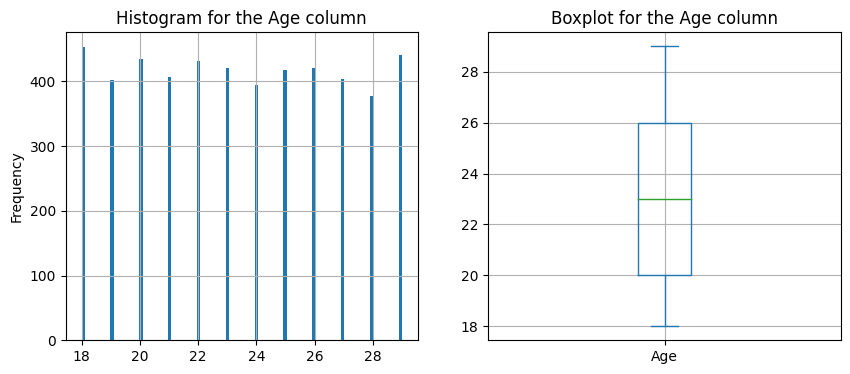

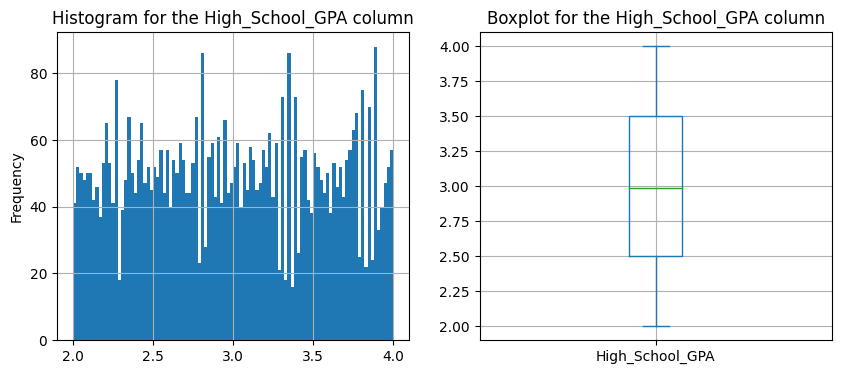

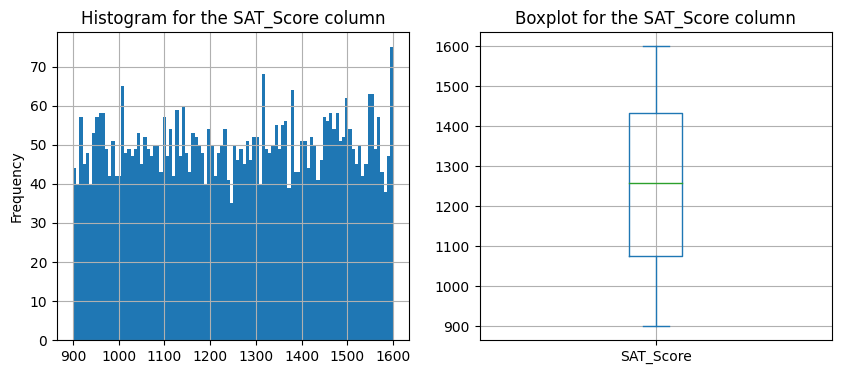

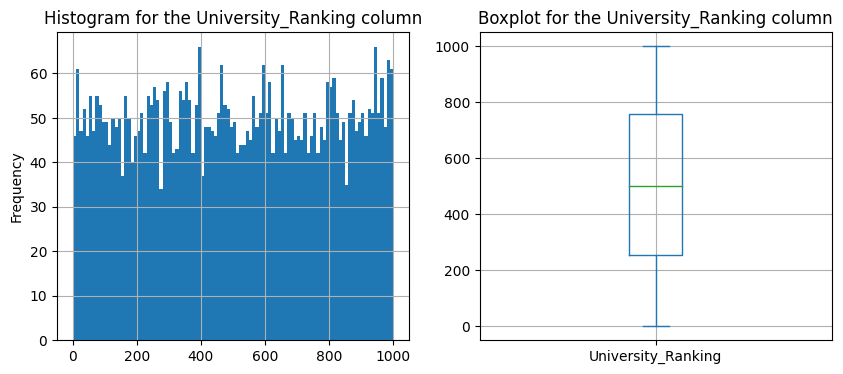

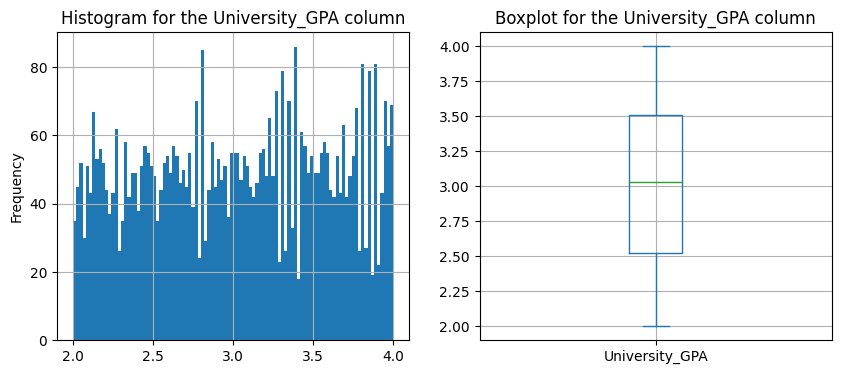

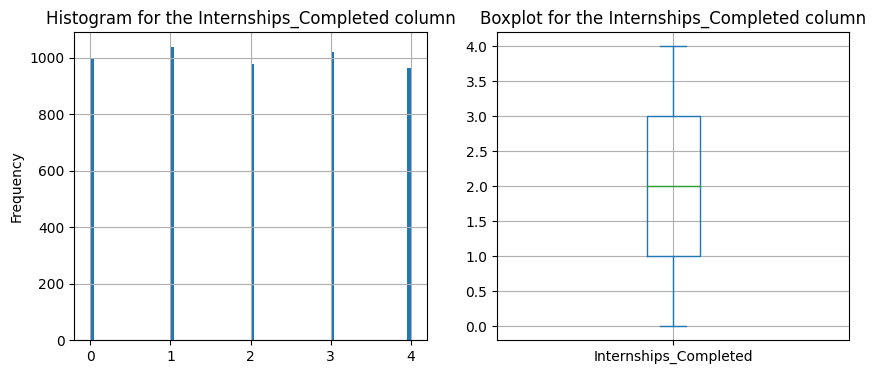

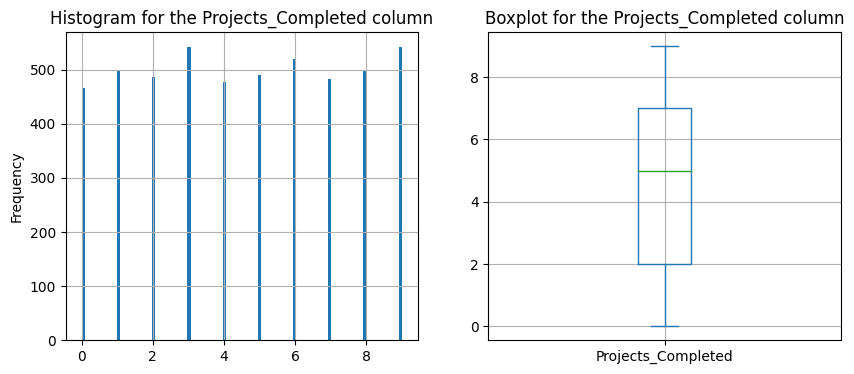

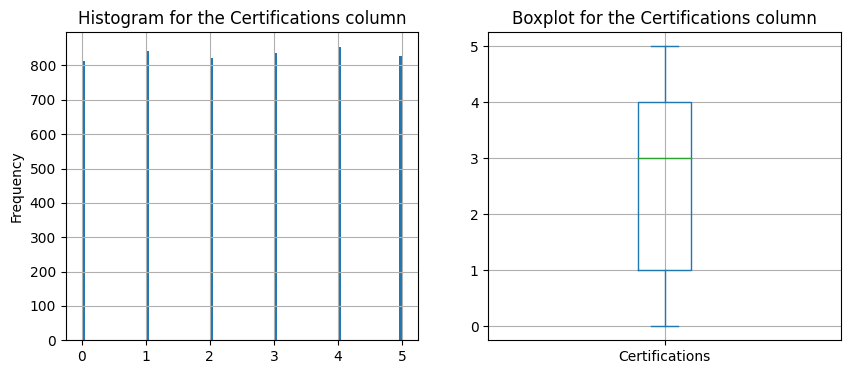

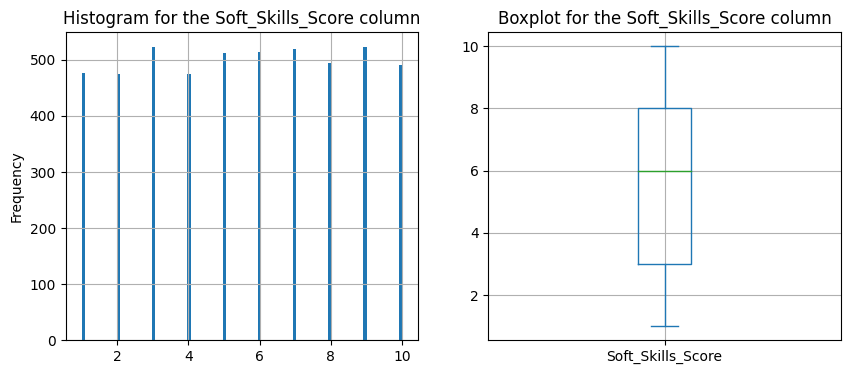

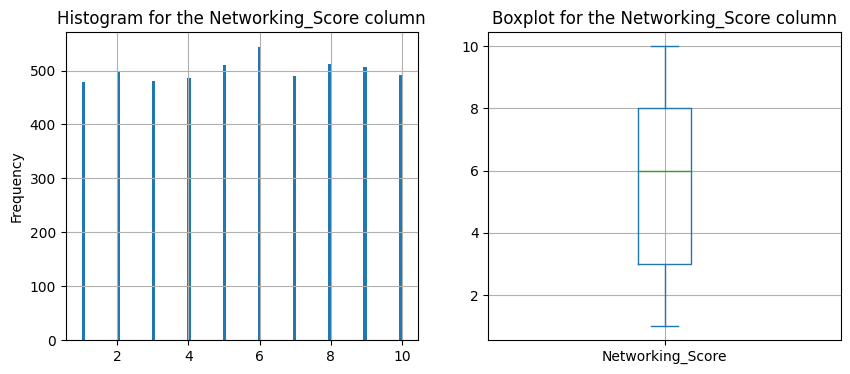

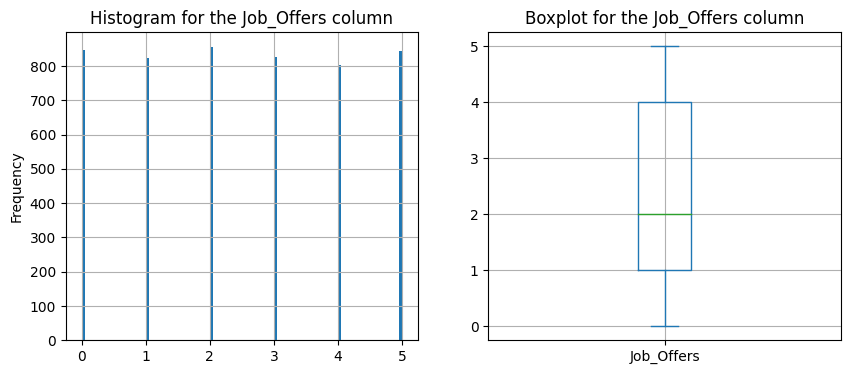

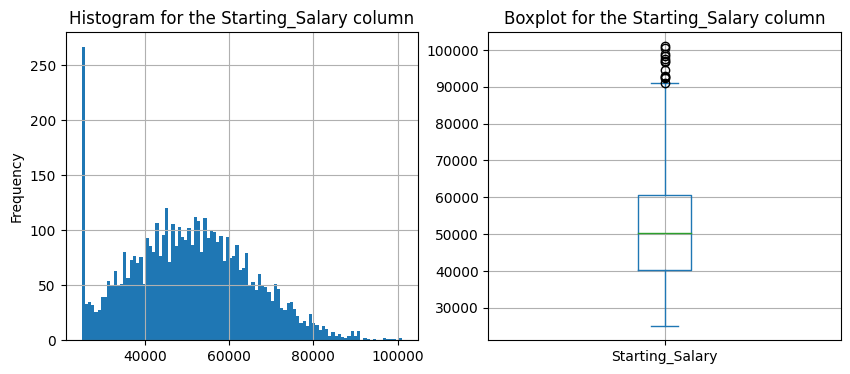

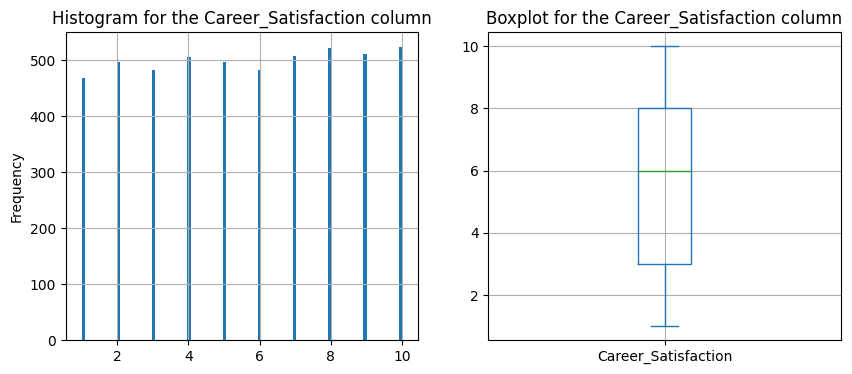

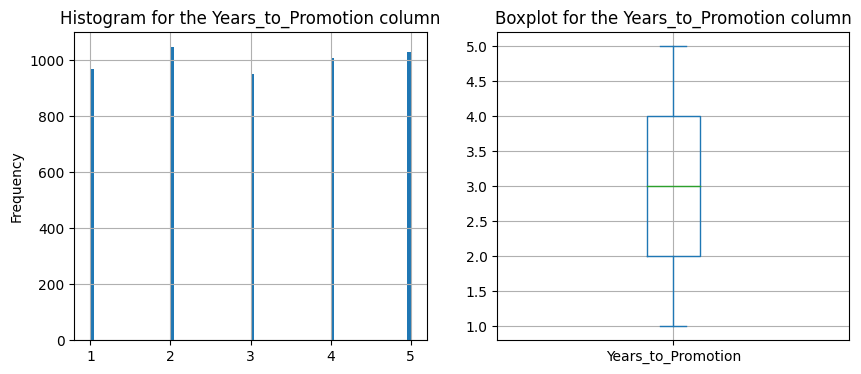

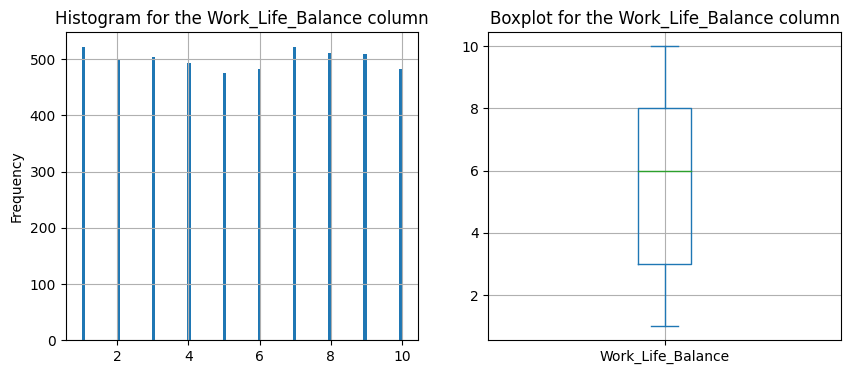

In [15]:
for n in [n for n in df.columns if df[n].dtype!="object"]:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)  
    df[n].plot(kind="hist", bins=100, title=f"Histogram for the {n} column", grid=True)
    
    plt.subplot(1, 2, 2)  
    df[n].plot(kind="box", title=f"Boxplot for the {n} column", grid=True)
    
    plt.show()



In [12]:
correlation = df.corr()
correlation

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
Age,1.000000,0.002997,-0.002416,0.031417,-0.015253,0.007662,0.002919,0.010161,0.006055,-0.001647,-0.030368,0.013171,0.011029,-0.004223,-0.008180
High_School_GPA,0.002997,1.000000,-0.018129,0.014341,0.004969,-0.002867,-0.035227,-0.015618,0.014706,0.001765,0.016809,-0.009152,-0.023750,-0.009684,-0.018028
SAT_Score,-0.002416,-0.018129,1.000000,0.006149,0.017922,-0.005634,-0.010944,0.017323,0.001146,-0.003377,0.019301,0.002776,0.002960,0.015944,0.017031
University_Ranking,0.031417,0.014341,0.006149,1.000000,-0.004471,-0.022563,0.008966,0.018350,-0.004211,-0.016708,0.013199,0.021368,-0.011613,0.000803,0.011669
University_GPA,-0.015253,0.004969,0.017922,-0.004471,1.000000,-0.004300,0.004411,0.013369,-0.009201,0.006803,-0.014875,0.001022,-0.003371,0.011024,0.018964
Internships_Completed,0.007662,-0.002867,-0.005634,-0.022563,-0.004300,1.000000,0.013750,0.023569,0.034905,0.004430,0.031658,0.018080,0.005561,-0.002264,0.009653
Projects_Completed,0.002919,-0.035227,-0.010944,0.008966,0.004411,0.013750,1.000000,-0.010602,0.015033,0.000466,-0.031339,0.015192,0.006001,-0.011763,-0.020344
Certifications,0.010161,-0.015618,0.017323,0.018350,0.013369,0.023569,-0.010602,1.000000,-0.014266,-0.001476,-0.006917,-0.018367,0.014262,0.004187,-0.018021
Soft_Skills_Score,0.006055,0.014706,0.001146,-0.004211,-0.009201,0.034905,0.015033,-0.014266,1.000000,0.010198,-0.008501,0.004870,0.012900,-0.002036,-0.010486
Networking_Score,-0.001647,0.001765,-0.003377,-0.016708,0.006803,0.004430,0.000466,-0.001476,0.010198,1.000000,-0.016600,0.002622,0.002302,-0.011216,-0.010118


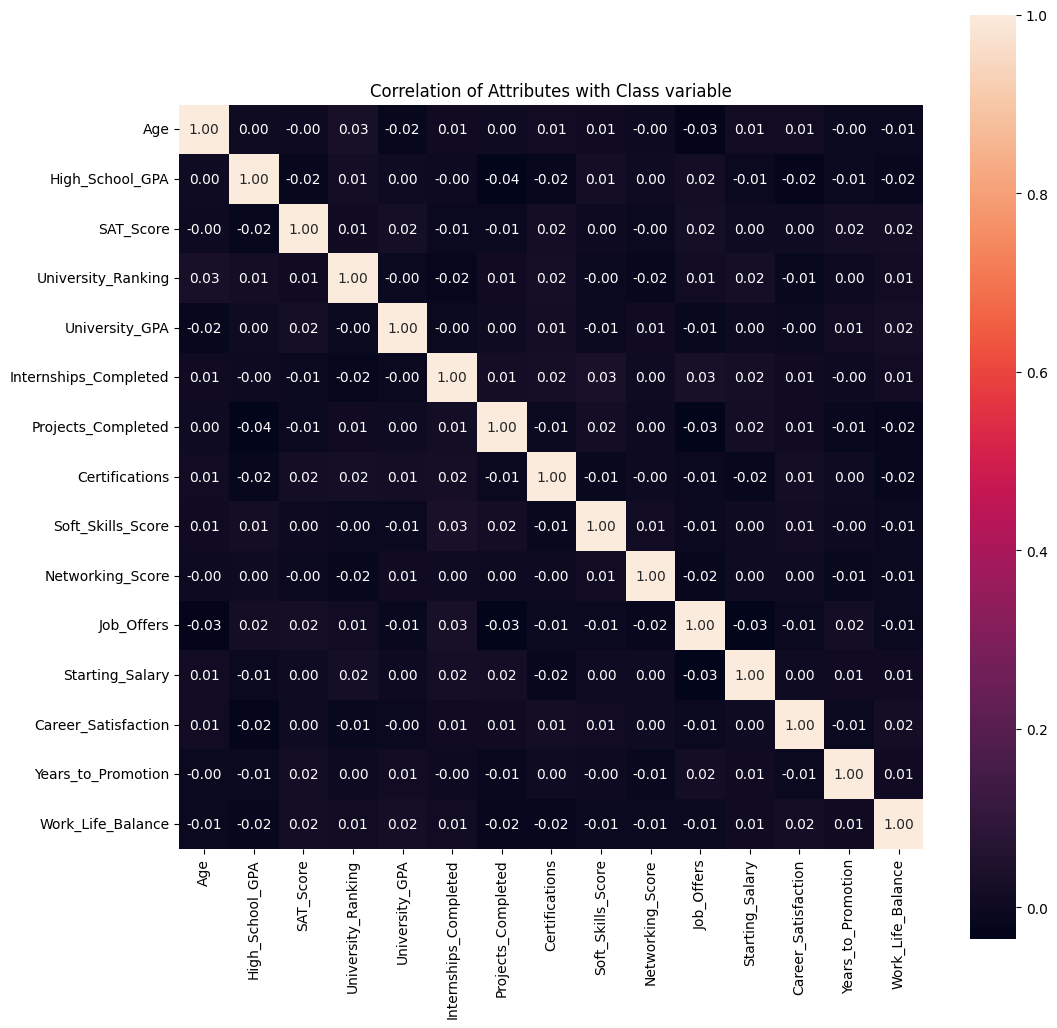

In [13]:
# Correlation Heat Map
import seaborn as sns

plt.figure(figsize=(12,12))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot = True, fmt = ".2f", linecolor="white")
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()
